## Setup

In [1]:
import os
from copy import deepcopy
os.environ['CUDA_VISIBLE_DEVICES'] = ''

import numpy as np
import sklearn.decomposition
import matplotlib.pyplot as plt
from hdf5storage import loadmat, savemat

import torch
import torch.nn as nn
import torch.nn.functional as F

from api.preprocessing import sound2coch
from api.librispeech import LibriDataset
from api.model import SpeechRecognitionCTC

# CUDA for PyTorch
device = torch.device("cpu")
print(device)

cpu


## Load trained model

In [2]:
LibriDataset.set_mode('word') # Should be one of 'grapheme', 'phoneme', 'word'

freq_bins = 65
size_vocab = LibriDataset.vocab_size()
print(f'Frequency dimension: {freq_bins}, alphabet size: {size_vocab}')

Frequency dimension: 65, alphabet size: 10002


In [3]:
N_LAYER, N_NODES = 5, 500
model_id = f'{LibriDataset.MODE}-{N_LAYER}-{N_NODES}'
model_arch = dict(rnn_hidden_size=N_NODES, nb_layers=N_LAYER, window_size=1, rnn_stride=1)
model_name = 'models/model-ctc-{:s}'.format(model_id)

print(model_id)

word-5-500


In [4]:
model = SpeechRecognitionCTC(rnn_type=nn.GRU, labels=LibriDataset.alphabet(), **model_arch, freq_bins=freq_bins)
model = model.to(device)

model.load_state_dict(torch.load(f'{model_name}.pt', map_location=device))
model.eval();

## Inferrence

In [5]:
'''

model.eval()
with torch.no_grad():
    xs = torch.Tensor(cochleagram).unsqueeze(0)
    xs = xs.type(torch.float32).to(device)
    xlen = torch.LongTensor([xs.shape[1]])
    z, zlen = model.predict(xs, xlen)
    
    zi = [_ for _ in z.squeeze().argmax(dim=1)]
    for i in range(len(zi)-1,0,-1):
        if zi[i] == zi[i-1]: zi = zi[:i-1] + zi[i:]
    zi = [alphabet[_] for _ in zi if _ > 0]
    
    zi = ['<SPACE>' if _ == LibriDataset.SYM_SPACE else _ for _ in zi]
    zi = ' '.join(zi)
    
    print(zi)
    print()
    
    activation = model.activations(xs)
    activation = [x.squeeze(0).numpy().astype('float32') for x in activation]
    # activation = [trans[layer].transform(activation[layer]) for layer in range(nb_layers)]

'''
Speakers=['f1','f2','f3','f6','f7','f8','m2','m4','m5','m6','m7','m8']
alphabet = LibriDataset.alphabet()
maindir='./sounds/digits/'
activation=[]
prediction=[]
for spkr in Speakers:
    actv=[]
    pred=[]
    for SNR in np.arange(91,0, -10):
        subfile=spkr+'SNR_'+str(SNR)
        sound_file = maindir+'sounds/'+subfile+'.wav'
        cochleagram = sound2coch(sound_file)
        pred.append(model.get_prediction(cochleagram))
        actv.append(model.get_activation(cochleagram))
    activation.append(actv)
    prediction.append(pred)

    
print((activation[0][0][0].shape)) # dimentions: spk, snr, layer,time,neuron

here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
here
(1145, 500)


In [6]:
print((prediction[0][9]))

AND EVEN WHY <NIL> THREE FOUR I DICK THAT A I


## loading phonemes for each file:

In [7]:
# trans = []
# for layer in range(nb_layers):
#     svd = sklearn.decomposition.TruncatedSVD(n_components=65, n_iter=25)
#     svd.fit(acts_libri[layer])
#     trans.append(svd)

In [8]:
# savemat(f'activations-ctc-{model_id}-100hz-20ms.mat', mdict={'acts_neural': acts_neural, 'stim_neural': stim_neural})

In [9]:
import wave
w = wave.open(sound_file, 'r')
print(cochleagram.shape)
sr=w.getnframes()/cochleagram.shape[0]
print(w.getnframes()/16000*100)
print(cochleagram.shape[0]/100)

(1061, 65)
1040.8
10.61


In [10]:
from utils import load_data_5
all_phn=[]
all_wrd=[]
name=maindir
for spkr in Speakers:
    tempPhn=[]
    tempWrd=[]
    for SNR in np.arange(91,0, -10):
        subfile=spkr+'SNR_'+str(SNR)
        phname, nphonemes, phonemes, wrdname, nwords, words= load_data_5(name, subfile)
        tempPhn.append(phonemes)
        tempWrd.append(words)
    all_phn.append(tempPhn)
    all_wrd.append(tempWrd)
        

f1SNR_91.phn
f1SNR_81.phn
f1SNR_71.phn
f1SNR_61.phn
f1SNR_51.phn
f1SNR_41.phn
f1SNR_31.phn
f1SNR_21.phn
f1SNR_11.phn
f1SNR_1.phn
f2SNR_91.phn
f2SNR_81.phn
f2SNR_71.phn
f2SNR_61.phn
f2SNR_51.phn
f2SNR_41.phn
f2SNR_31.phn
f2SNR_21.phn
f2SNR_11.phn
f2SNR_1.phn
f3SNR_91.phn
f3SNR_81.phn
f3SNR_71.phn
f3SNR_61.phn
f3SNR_51.phn
f3SNR_41.phn
f3SNR_31.phn
f3SNR_21.phn
f3SNR_11.phn
f3SNR_1.phn
f6SNR_91.phn
f6SNR_81.phn
f6SNR_71.phn
f6SNR_61.phn
f6SNR_51.phn
f6SNR_41.phn
f6SNR_31.phn
f6SNR_21.phn
f6SNR_11.phn
f6SNR_1.phn
f7SNR_91.phn
f7SNR_81.phn
f7SNR_71.phn
f7SNR_61.phn
f7SNR_51.phn
f7SNR_41.phn
f7SNR_31.phn
f7SNR_21.phn
f7SNR_11.phn
f7SNR_1.phn
f8SNR_91.phn
f8SNR_81.phn
f8SNR_71.phn
f8SNR_61.phn
f8SNR_51.phn
f8SNR_41.phn
f8SNR_31.phn
f8SNR_21.phn
f8SNR_11.phn
f8SNR_1.phn
m2SNR_91.phn
m2SNR_81.phn
m2SNR_71.phn
m2SNR_61.phn
m2SNR_51.phn
m2SNR_41.phn
m2SNR_31.phn
m2SNR_21.phn
m2SNR_11.phn
m2SNR_1.phn
m4SNR_91.phn
m4SNR_81.phn
m4SNR_71.phn
m4SNR_61.phn
m4SNR_51.phn
m4SNR_41.phn
m4SNR_31.phn
m4SNR_

# Looking at the average activation for each number for one speaker for each layer:

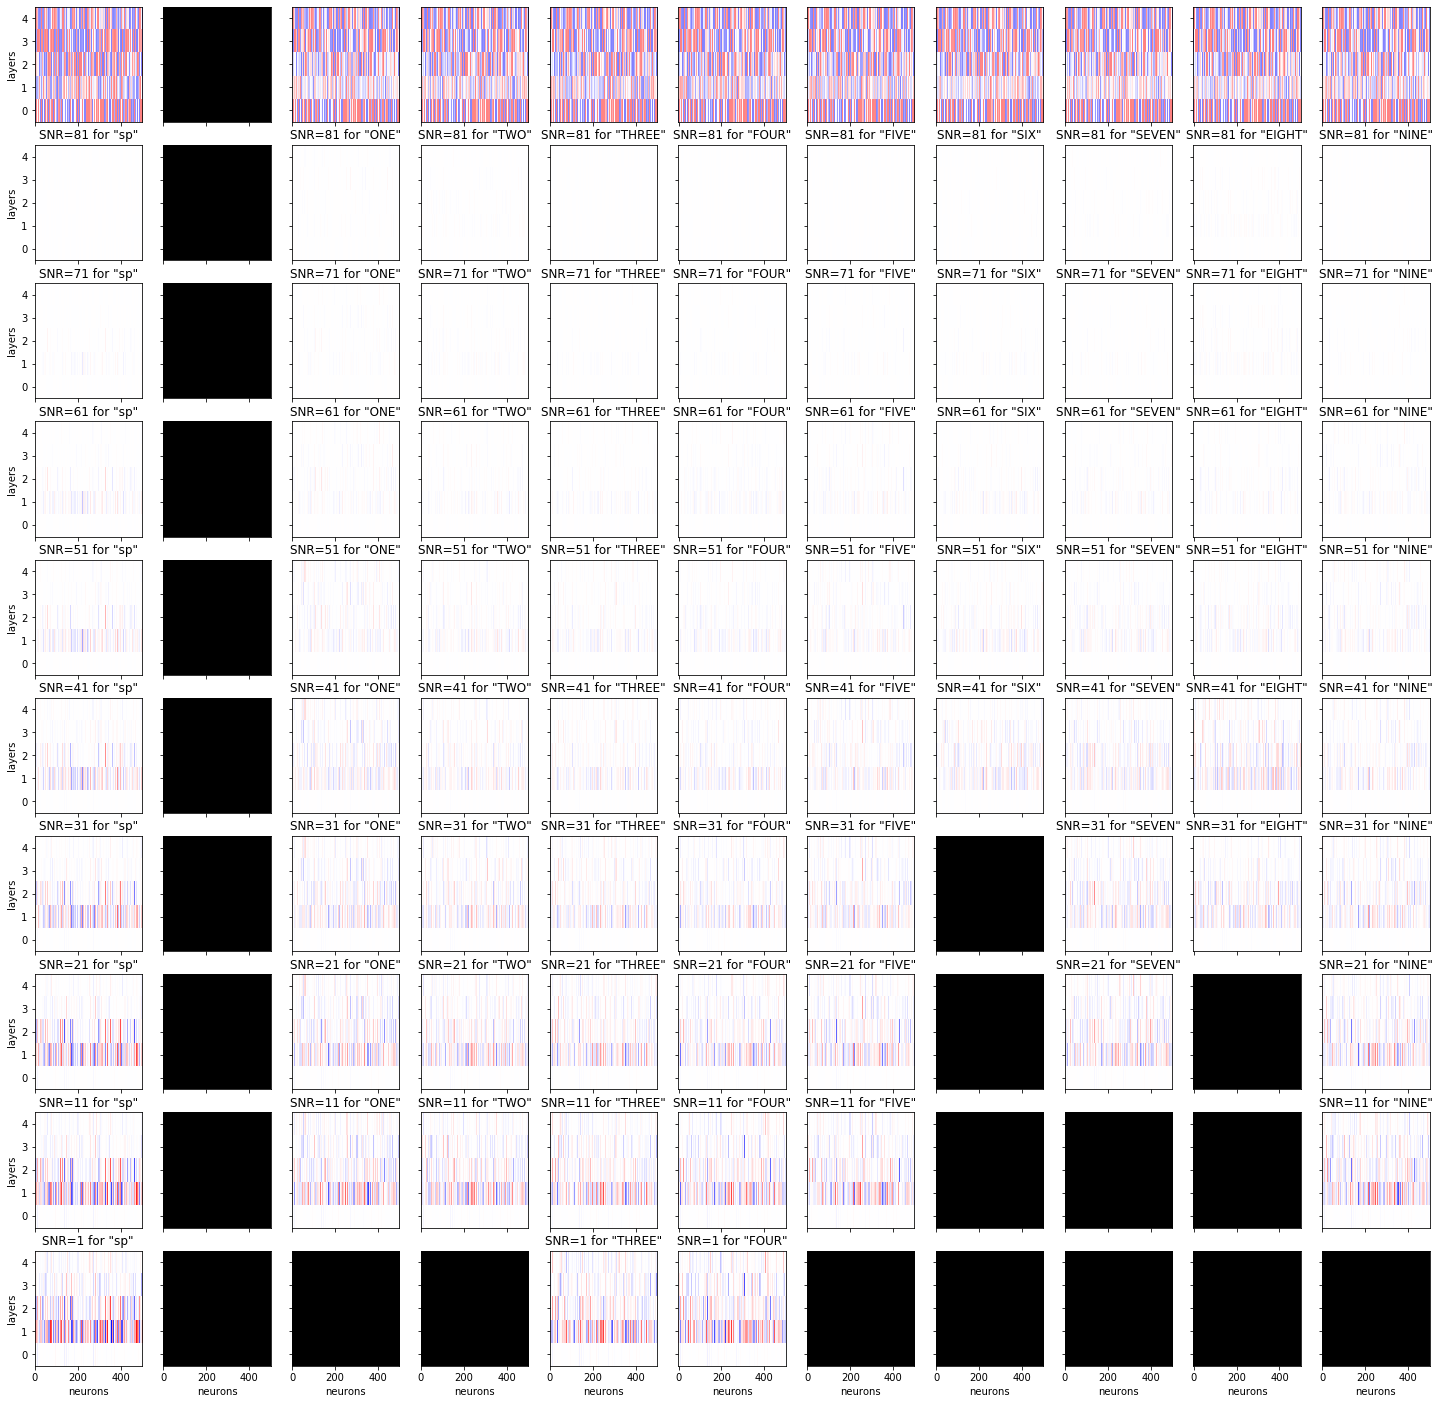

In [11]:
import numpy.matlib
spkr=0
SNRv=np.arange(91,0, -10)

NumberStr=['"sp"', '"ZERO"','"ONE"','"TWO"','"THREE"', '"FOUR"',
           '"FIVE"', '"SIX"', '"SEVEN"','"EIGHT"', '"NINE"']
avg_actv_SnrVsNmr=np.zeros((len(SNRv),len(NumberStr),N_LAYER,N_NODES))
fig, axs = plt.subplots(len(SNRv), len(NumberStr),figsize=(25,25))
for SNR in range(10):#np.arange(91,0, -10):
    for number in range(11): # sp+ 0:9
        #getting the timings for the number if predicted correctly
        if number==0:
            mystring=' '
        else:
            mystring=NumberStr[number][1:-1]
            
        if mystring in prediction[spkr][SNR]:
            start_time=[ np.round(wrd[0]*100) for wrd in all_wrd[spkr][SNR][0] if wrd[2]==NumberStr[number] ]
            finish_time=[ np.round(wrd[1]*100) for wrd in all_wrd[spkr][SNR][0] if wrd[2]==NumberStr[number] ]
            for layr in range(N_LAYER):
                for neuron in range(N_NODES):
                    temp=[np.mean(
                        activation[spkr][SNR][layr][start_time[idd].astype('int'):finish_time[idd].astype('int'),neuron])
                          for idd in range(len(start_time))]

                    avg_actv_SnrVsNmr[SNR, number, layr,neuron]=np.mean(temp)# spk, snr, layer,time,neuron
            if SNR==0:
                axs[SNR, number].imshow(np.squeeze(avg_actv_SnrVsNmr[SNR, number,:,:])
                                        ,vmin=-2, vmax=2, cmap='bwr',
                                        aspect='auto')
                axs[SNR, number].invert_yaxis()
                
            else:
                axs[SNR, number].imshow(np.squeeze(avg_actv_SnrVsNmr[SNR, number,:,:])
                                        -np.squeeze(avg_actv_SnrVsNmr[0, number,:,:]),vmin=-2, vmax=2, cmap='bwr',
                                        aspect='auto')
                axs[SNR, number].set_title('SNR='+str(SNRv[SNR])+' for '+ NumberStr[number])
                axs[SNR, number].invert_yaxis()
        else:
            axs[SNR, number].imshow(np.squeeze(avg_actv_SnrVsNmr[SNR, number,:,:])
                                        ,vmin=-1, vmax=0, cmap='Greys',
                                        aspect='auto')
            axs[SNR, number].invert_yaxis()
for ax in axs.flat:
    ax.set(xlabel='neurons', ylabel='layers')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


# Looking at the change in activity time course as we increase the SNR

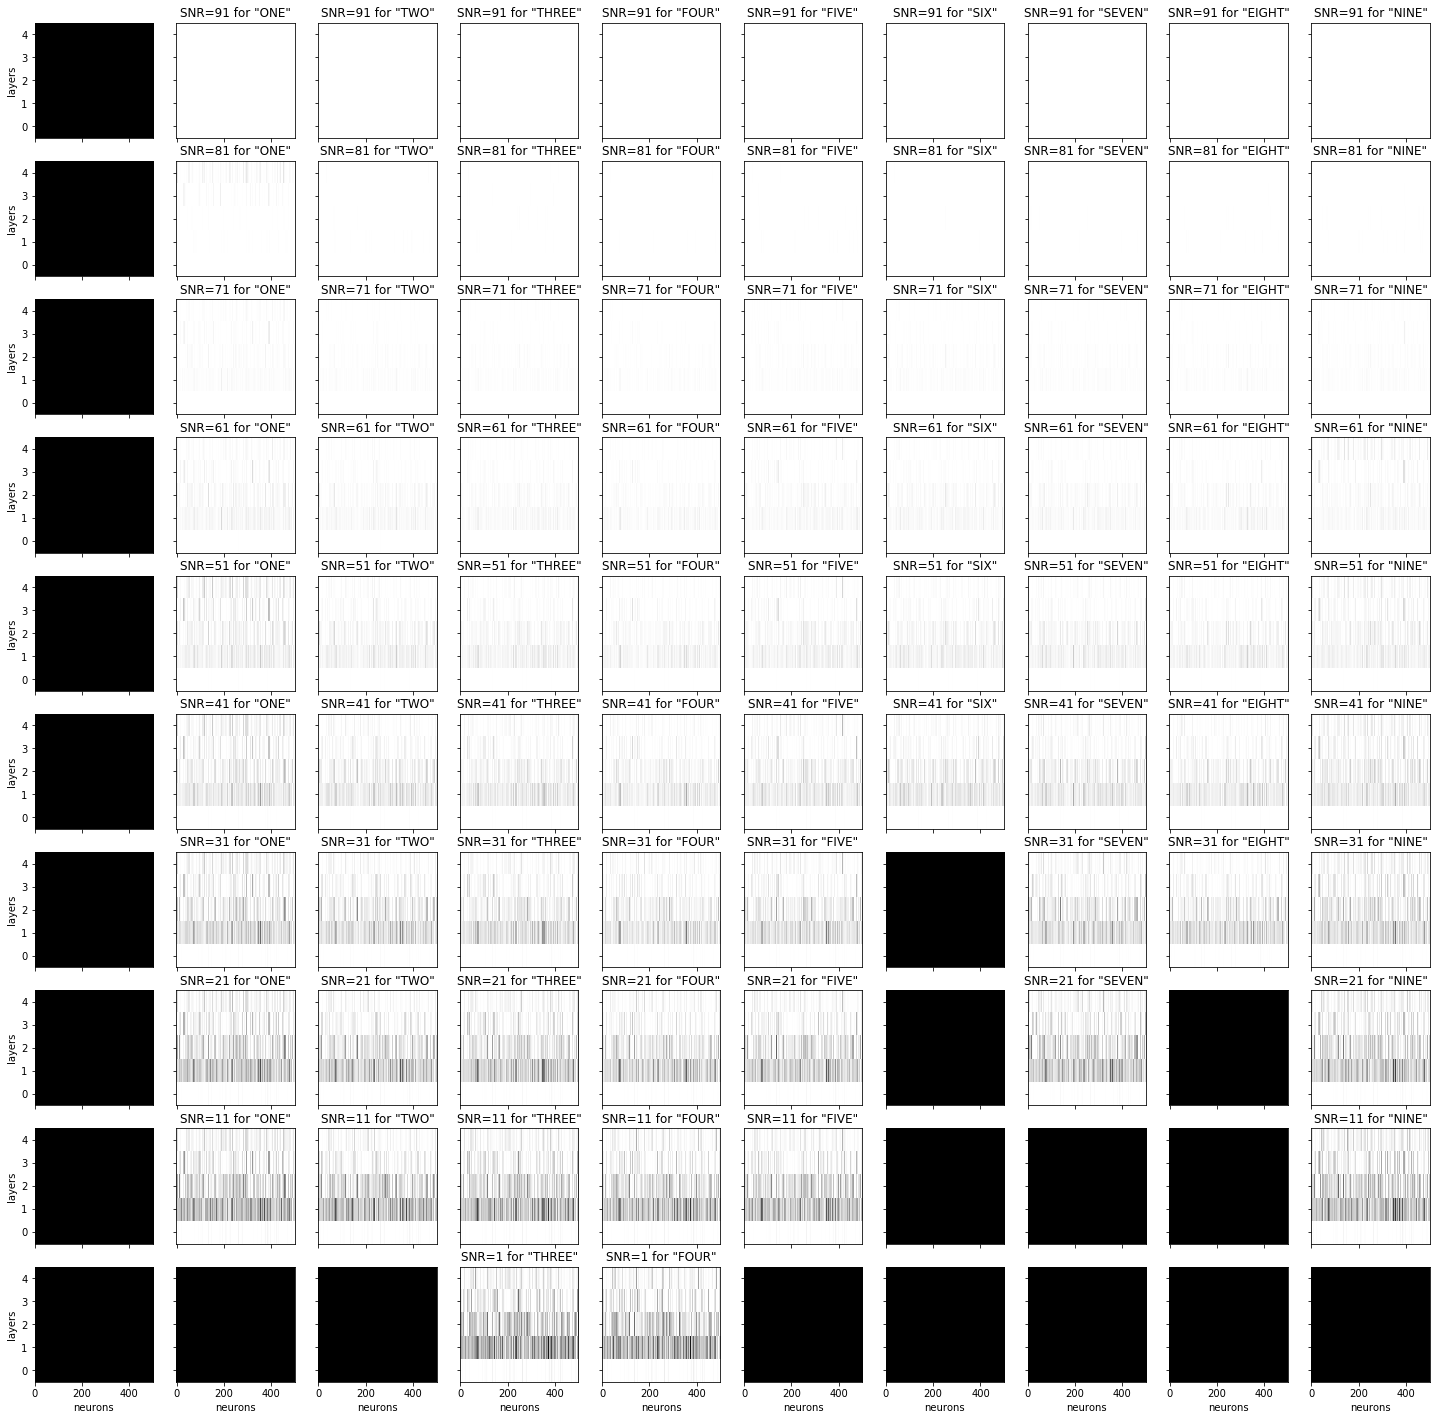

In [12]:

#since space has different time window length we don't count it in here:
NumberStr=[ '"ZERO"','"ONE"','"TWO"','"THREE"', '"FOUR"',
           '"FIVE"', '"SIX"', '"SEVEN"','"EIGHT"', '"NINE"']
avg_actv_SnrVsNmr2=np.zeros((len(SNRv),len(NumberStr),N_LAYER,N_NODES))*np.nan
fig, axs = plt.subplots(len(SNRv), len(NumberStr),figsize=(25,25))
#Ref=[[[[0]]*N_NODES]*N_LAYER]*len(NumberStr)
#print(np.array(Ref).shape)


## saving the time course for ref at SNR=0.

SNR=0 
Ref=[]
for number in np.arange(10): #0:9 numbers
    mystring=NumberStr[number][1:-1]
    start_time=[ np.round(wrd[0]*100) for wrd in all_wrd[spkr][SNR][0] if wrd[2]==NumberStr[number] ]
    finish_time=[ np.round(wrd[1]*100) for wrd in all_wrd[spkr][SNR][0] if wrd[2]==NumberStr[number] ]
    tmp2=[]
    for layr in range(N_LAYER):
        tmp1=[]
        for neuron in range(N_NODES):
            Sum_act_ref=0
            act_ref=[activation[spkr][SNR][layr][start_time[idd].astype('int'):finish_time[idd].astype('int'),neuron] 
                     for idd in range(len(start_time))]
            #print('inja',len(act_ref[0]), 'add', number,layr,neuron)
            #act_ref=sum(act_ref)/len(act_ref)
            tmp1.append(act_ref[0])
        tmp2.append(tmp1)
    Ref.append(tmp2)
for SNR in range(10):#np.arange(91,0, -10):
    for number in np.arange(10): # sp+ 0:9
        #getting the timings for the number if predicted correctly

        mystring=NumberStr[number][1:-1]
            
        if mystring in prediction[spkr][SNR]:
            start_time=[ np.round(wrd[0]*100) for wrd in all_wrd[spkr][0][0] if wrd[2]==NumberStr[number] ]
            finish_time=[ np.round(wrd[1]*100) for wrd in all_wrd[spkr][0][0] if wrd[2]==NumberStr[number] ]
            for layr in range(N_LAYER):
                for neuron in range(N_NODES):
                    temp=[np.sqrt(np.mean(
                        (activation[spkr][SNR][layr][start_time[idd].astype('int'):finish_time[idd].astype('int'),neuron]-Ref[number][layr][neuron])**2)) 
                          for idd in range(len(start_time))]

                    avg_actv_SnrVsNmr2[SNR, number, layr,neuron]=np.mean(temp)# spk, snr, layer,time,neuron
                    
            axs[SNR, number].imshow(np.squeeze(avg_actv_SnrVsNmr2[SNR, number,:,:])
                                        ,vmin=0, vmax=2, cmap='binary',
                                        aspect='auto')
            axs[SNR, number].set_title('SNR='+str(SNRv[SNR])+' for '+ NumberStr[number])
            axs[SNR, number].invert_yaxis()
        else:
            massk=np.isnan(np.squeeze(avg_actv_SnrVsNmr2[SNR, number,:,:]))
            axs[SNR, number].imshow(massk,vmin=0, vmax=1, cmap='Greys',aspect='auto')
            axs[SNR, number].invert_yaxis()
for ax in axs.flat:
    ax.set(xlabel='neurons', ylabel='layers')
    

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

# dividing into two groups of sensetive to SNR and insensetive

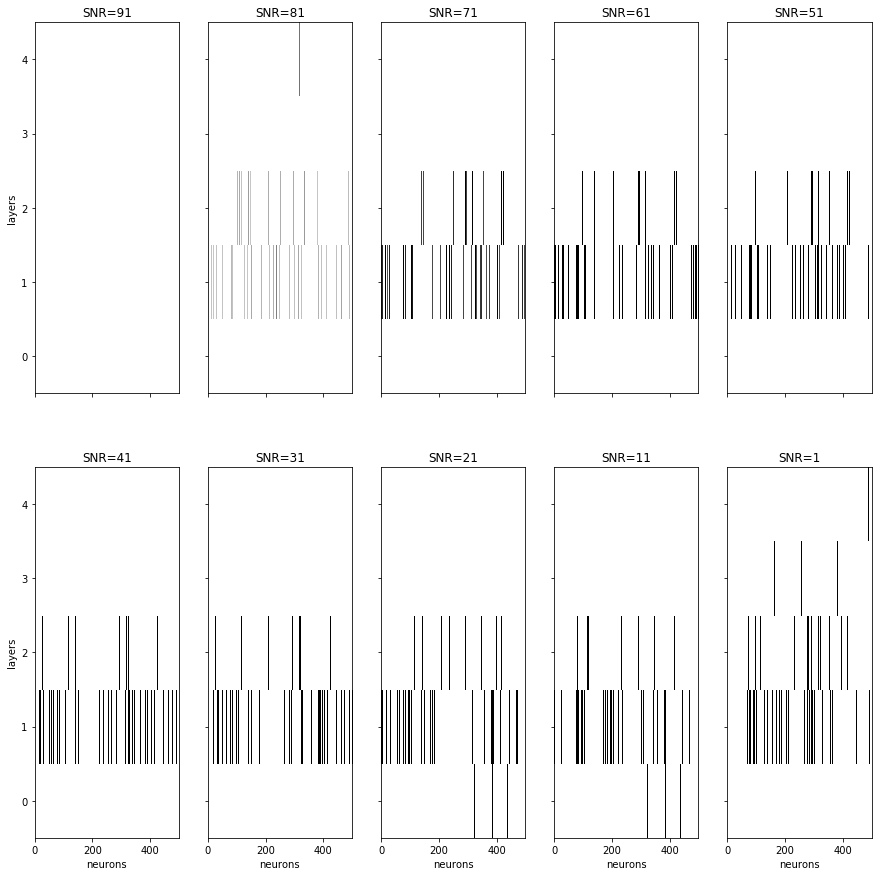

In [13]:
# calculating the variance across number of each neuran for each SNR
# and choosing neurons with small variance as noise sensetive
#avg_actv_SnrVsNmr2=np.zeros((len(SNRv),len(NumberStr),N_LAYER,N_NODES))
eps=1e-2
Sens_score=(np.nanmean(avg_actv_SnrVsNmr2, axis=1)+eps/100)/(np.nanstd(avg_actv_SnrVsNmr2, axis=1)+eps) 
fig, axs = plt.subplots(2, 5,figsize=(15,15))
P_value=0.95 # one_sided
axs = axs.ravel()
for SNR in range(10):
    sort_score=np.sort(np.squeeze(Sens_score[SNR,:,:]).flatten())[::-1]
    cut=np.floor((1-P_value)*len(sort_score)).astype('int')
    cut_v=sort_score[cut]
    
    axs[SNR].imshow(np.squeeze(((Sens_score[SNR,:,:])>cut_v)*Sens_score[SNR,:,:])
                    ,vmin=0, vmax=2, cmap='binary',aspect='auto')
    axs[SNR].set_title('SNR='+str(SNRv[SNR]))
    axs[SNR].invert_yaxis()
for ax in axs.flat:
    ax.set(xlabel='neurons', ylabel='layers')
    

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

    
    
    


In [14]:
# to do: r value/ categorization based on each layer

# looking at the r values

(10, 5, 500)


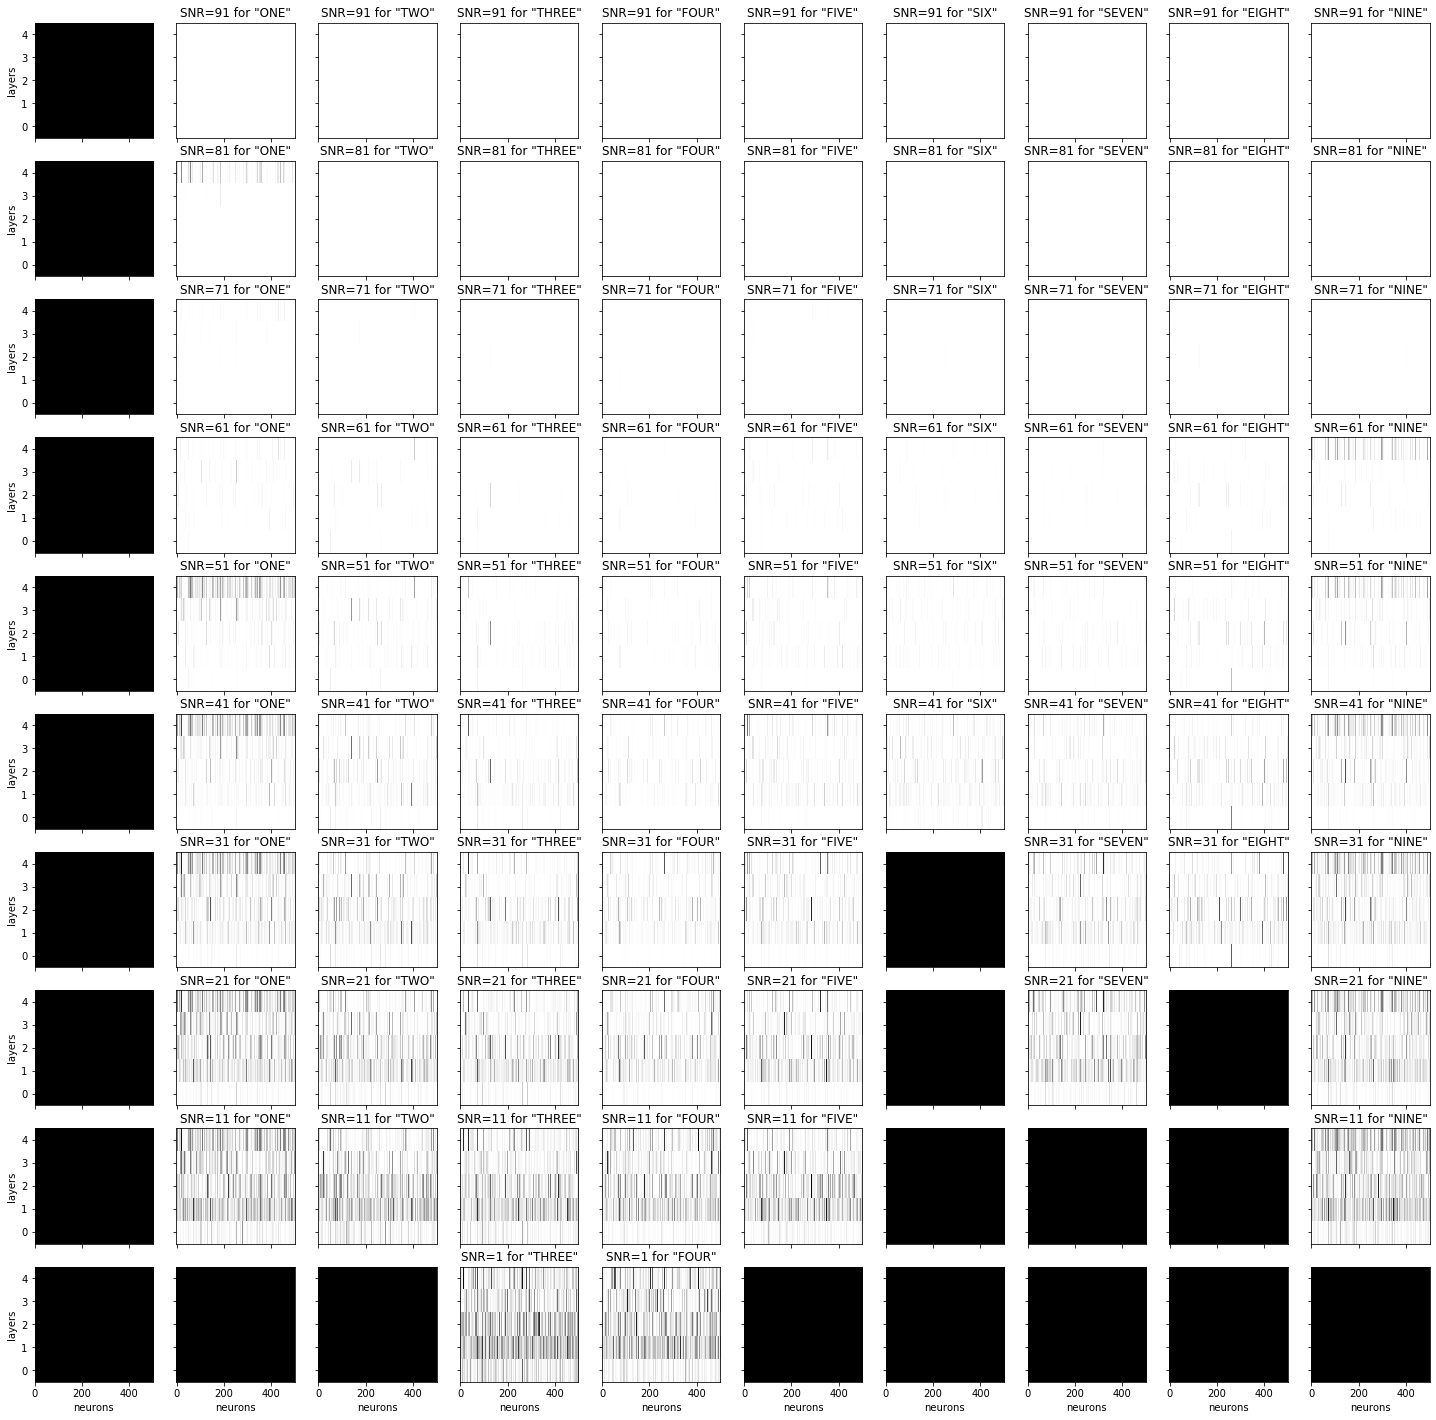

In [15]:

#since space has different time window length we don't count it in here:
NumberStr=[ '"ZERO"','"ONE"','"TWO"','"THREE"', '"FOUR"',
           '"FIVE"', '"SIX"', '"SEVEN"','"EIGHT"', '"NINE"']
avg_actv_SnrVsNmrR=np.zeros((len(SNRv),len(NumberStr),N_LAYER,N_NODES))*np.nan
fig, axs = plt.subplots(len(SNRv), len(NumberStr),figsize=(25,25))
#Ref=[[[[0]]*N_NODES]*N_LAYER]*len(NumberStr)
print(np.array(Ref).shape)


## saving the time course for ref at SNR=0.

SNR=0 
Ref=[]
for number in np.arange(10): #0:9 numbers
    mystring=NumberStr[number][1:-1]
    start_time=[ np.round(wrd[0]*100) for wrd in all_wrd[spkr][SNR][0] if wrd[2]==NumberStr[number] ]
    finish_time=[ np.round(wrd[1]*100) for wrd in all_wrd[spkr][SNR][0] if wrd[2]==NumberStr[number] ]
    tmp2=[]
    for layr in range(N_LAYER):
        tmp1=[]
        for neuron in range(N_NODES):
            Sum_act_ref=0
            act_ref=[activation[spkr][SNR][layr][start_time[idd].astype('int'):finish_time[idd].astype('int'),neuron] 
                     for idd in range(len(start_time))]
            #print('inja',len(act_ref[0]), 'add', number,layr,neuron)
            #act_ref=sum(act_ref)/len(act_ref)
            tmp1.append(act_ref[0])
        tmp2.append(tmp1)
    Ref.append(tmp2)
for SNR in range(10):#np.arange(91,0, -10):
    for number in np.arange(10): # sp+ 0:9
        #getting the timings for the number if predicted correctly

        mystring=NumberStr[number][1:-1]
            
        if mystring in prediction[spkr][SNR]:
            start_time=[ np.round(wrd[0]*100) for wrd in all_wrd[spkr][0][0] if wrd[2]==NumberStr[number] ]
            finish_time=[ np.round(wrd[1]*100) for wrd in all_wrd[spkr][0][0] if wrd[2]==NumberStr[number] ]
            for layr in range(N_LAYER):
                for neuron in range(N_NODES):
                    temp=[np.corrcoef(
                        activation[spkr][SNR][layr][start_time[idd].astype('int'):finish_time[idd].astype('int'),neuron],Ref[number][layr][neuron])[0,1] 
                          for idd in range(len(start_time))]

                    avg_actv_SnrVsNmrR[SNR, number, layr,neuron]=np.mean(temp)# spk, snr, layer,time,neuron
                    
            axs[SNR, number].imshow(-1*np.squeeze(avg_actv_SnrVsNmrR[SNR, number,:,:])
                                        ,vmin=-1, vmax=1, cmap='binary',
                                        aspect='auto')
            axs[SNR, number].set_title('SNR='+str(SNRv[SNR])+' for '+ NumberStr[number])
            axs[SNR, number].invert_yaxis()
        else:
            massk=np.isnan(np.squeeze(avg_actv_SnrVsNmrR[SNR, number,:,:]))
            axs[SNR, number].imshow(massk,vmin=0, vmax=1, cmap='Greys',aspect='auto')
            axs[SNR, number].invert_yaxis()
for ax in axs.flat:
    ax.set(xlabel='neurons', ylabel='layers')
    

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

# looking at the pca of activities and trajectories

10


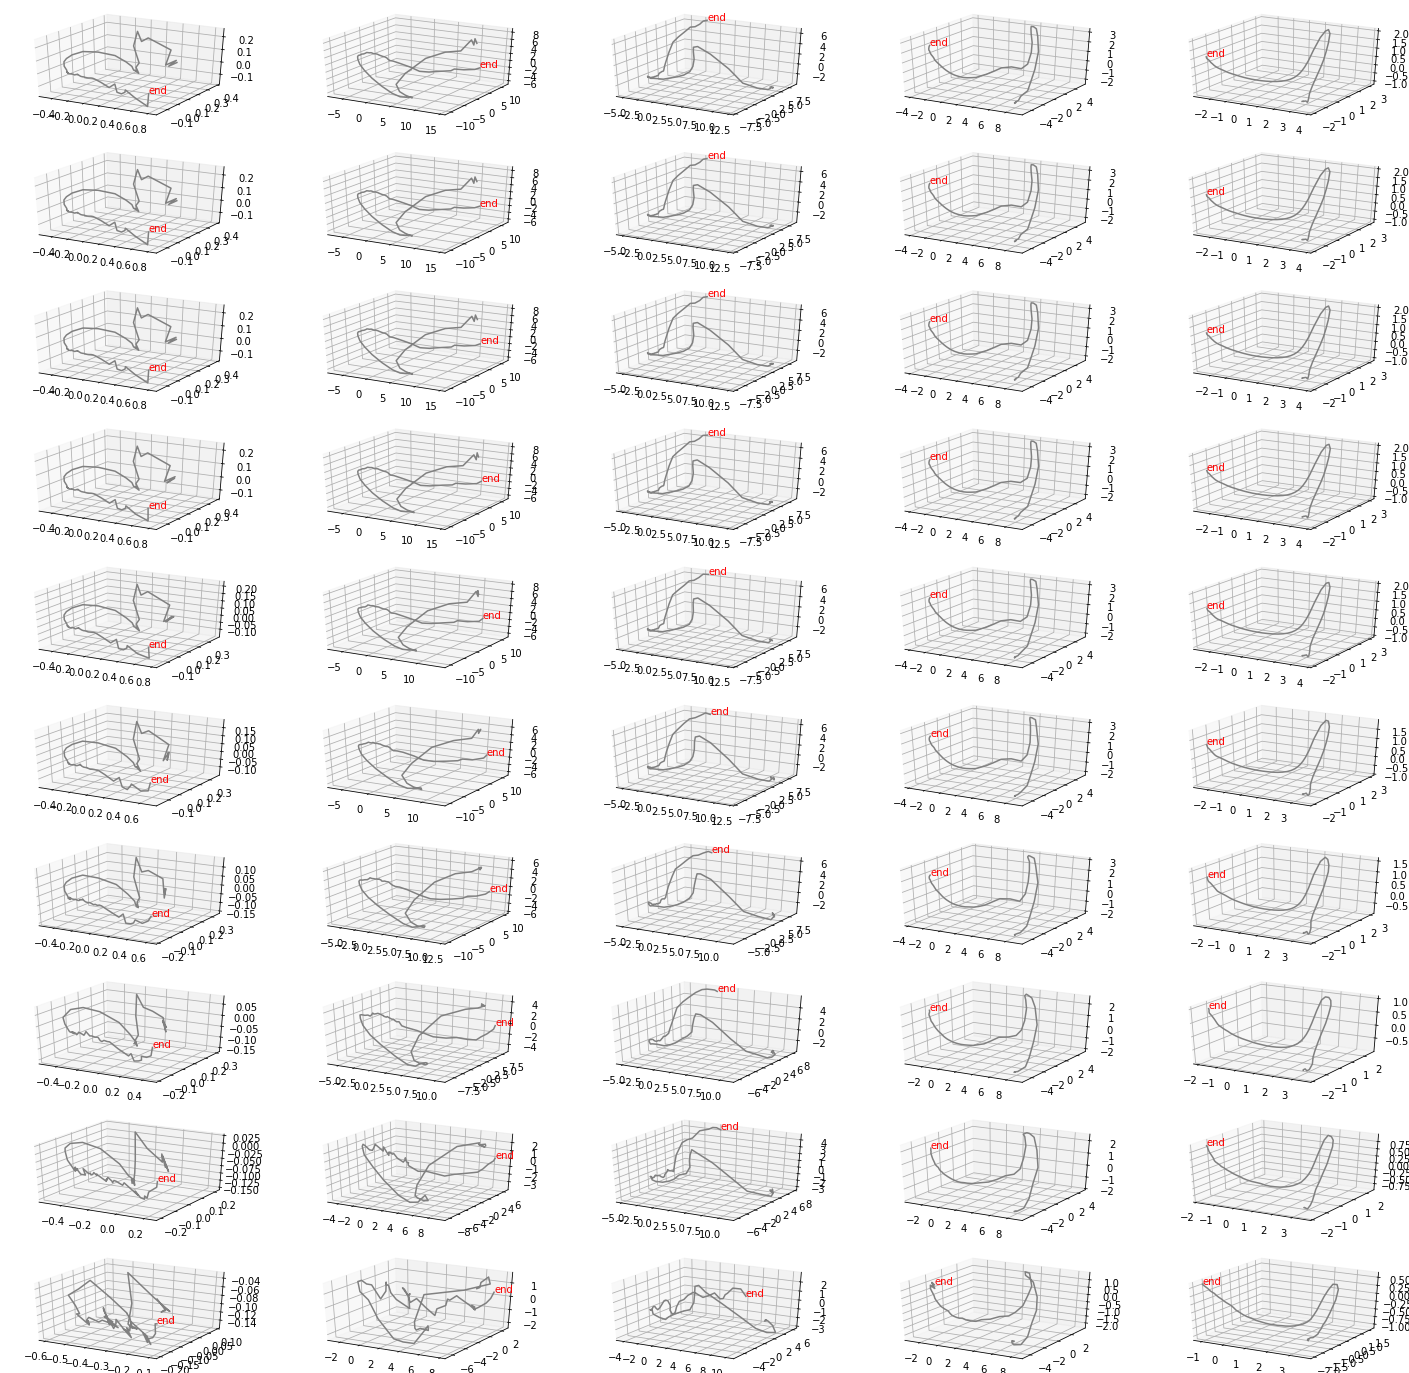

'\npca = PCA(n_components=3)\npca.fit(X)\nactR=pca\n'

In [16]:
# for each speaker and each number look at the subplot of SNR vs layer:
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
NumberStr=[ '"ZERO"','"ONE"','"TWO"','"THREE"', '"FOUR"',
           '"FIVE"', '"SIX"', '"SEVEN"','"EIGHT"', '"NINE"']

number=3
actv_number=[]
mystring=NumberStr[number][1:-1]
start_time=[ np.round(wrd[0]*100) for wrd in all_wrd[spkr][0][0] if wrd[2]==NumberStr[number] ]# based on SNR 0
finish_time=[ np.round(wrd[1]*100) for wrd in all_wrd[spkr][0][0] if wrd[2]==NumberStr[number] ]
for SNR in np.arange(10): #0:9 numbers
    tmp2=[]
    for layr in range(N_LAYER):
        tmp1=[]
        for neuron in range(N_NODES):
            Sum_act_ref=0
            act_ref=[activation[spkr][SNR][layr][start_time[idd].astype('int'):finish_time[idd].astype('int'),neuron] 
                     for idd in range(len(start_time))]
            #print('inja',len(act_ref[0]), 'add', number,layr,neuron)
            #act_ref=sum(act_ref)/len(act_ref)
            tmp1.append(act_ref[0])
        tmp2.append(tmp1)
    actv_number.append(tmp2)
print(len(actv_number))

fig = plt.figure(figsize=(25,25))
pcaL=[]
for SNR in np.arange(10):
    for layr in range(N_LAYER):
        X=np.array(actv_number[SNR][layr]).T
        if SNR==0:
            pca=PCA(n_components=3)
            pca.fit(X)
            pcaL.append(pca)
        Red_act=pcaL[layr].transform(X)
        #axs[SNR, layr].axes(projection='3d')
        ax = fig.add_subplot(len(SNRv),N_LAYER , SNR*(N_LAYER)+layr+1, projection='3d')
        ax.plot3D(Red_act[:,0], Red_act[:,1], Red_act[:,2], 'gray')
        ax.text(Red_act[-1,0], Red_act[-1,1], Red_act[-1,2], "end", color='red')
        
plt.show()        
      

'''
pca = PCA(n_components=3)
pca.fit(X)
actR=pca
'''

# looking at the trejectories of SNR[0] and SNR[snr]

10


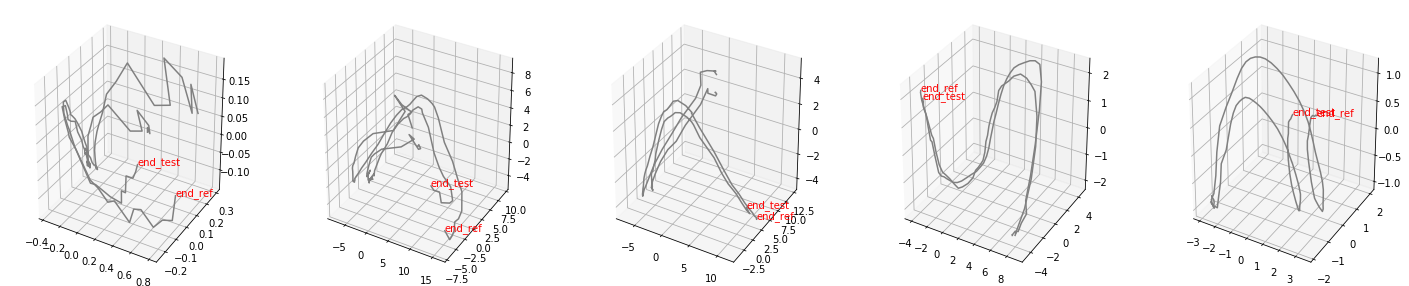

In [17]:
NumberStr=[ '"ZERO"','"ONE"','"TWO"','"THREE"', '"FOUR"',
           '"FIVE"', '"SIX"', '"SEVEN"','"EIGHT"', '"NINE"']

number_test=4
SNR_ref=0
SNR_test=8
actv_snrRef=[]
actv_snrTest=[]
mystring=NumberStr[number][1:-1]
start_time=[ np.round(wrd[0]*100) for wrd in all_wrd[spkr][0][0] if wrd[2]==NumberStr[number] ]# based on SNR 0
finish_time=[ np.round(wrd[1]*100) for wrd in all_wrd[spkr][0][0] if wrd[2]==NumberStr[number] ]
for number in np.arange(10): #0:9 numbers
    tmp2=[]
    mystring=NumberStr[number][1:-1]
    start_time=[ np.round(wrd[0]*100) for wrd in all_wrd[spkr][0][0] if wrd[2]==NumberStr[number] ]# based on SNR 0
    finish_time=[ np.round(wrd[1]*100) for wrd in all_wrd[spkr][0][0] if wrd[2]==NumberStr[number] ]
    for layr in range(N_LAYER):
        tmp1=[]
        for neuron in range(N_NODES):
            Sum_act_ref=0
            act_ref=[activation[spkr][SNR_ref][layr][start_time[idd].astype('int'):finish_time[idd].astype('int'),neuron] 
                     for idd in range(len(start_time))]
            #print('inja',len(act_ref[0]), 'add', number,layr,neuron)
            #act_ref=sum(act_ref)/len(act_ref)
            tmp1.append(act_ref[0])
        tmp2.append(tmp1)
    actv_snrRef.append(tmp2)
    
for number in np.arange(10): #0:9 numbers
    tmp2=[]
    mystring=NumberStr[number][1:-1]
    start_time=[ np.round(wrd[0]*100) for wrd in all_wrd[spkr][0][0] if wrd[2]==NumberStr[number] ]# based on SNR 0
    finish_time=[ np.round(wrd[1]*100) for wrd in all_wrd[spkr][0][0] if wrd[2]==NumberStr[number] ]
    for layr in range(N_LAYER):
        tmp1=[]
        for neuron in range(N_NODES):
            Sum_act_ref=0
            act_ref=[activation[spkr][SNR_test][layr][start_time[idd].astype('int'):finish_time[idd].astype('int'),neuron] 
                     for idd in range(len(start_time))]
            #print('inja',len(act_ref[0]), 'add', number,layr,neuron)
            #act_ref=sum(act_ref)/len(act_ref)
            tmp1.append(act_ref[0])
        tmp2.append(tmp1)
    actv_snrTest.append(tmp2)
print(len(actv_number))

fig = plt.figure(figsize=(25,5))

for layr in range(N_LAYER):
    X=np.array(actv_snrRef[number_test][layr]).T
    pca=PCA(n_components=3)
    pca.fit(X)
    Red_act_ref=pca.transform(X)
    X=np.array(actv_snrTest[number_test][layr]).T
    Red_act_test=pca.transform(X)
    #axs[SNR, layr].axes(projection='3d')
    ax = fig.add_subplot(1,N_LAYER , layr+1, projection='3d')
    ax.plot3D(Red_act_ref[:,0], Red_act_ref[:,1], Red_act_ref[:,2], 'gray')
    ax.text(Red_act_ref[-1,0], Red_act_ref[-1,1], Red_act_ref[-1,2], "end_ref", color='red')
    ax.plot3D(Red_act_test[:,0], Red_act_test[:,1], Red_act_test[:,2], 'gray')
    ax.text(Red_act_test[-1,0], Red_act_test[-1,1], Red_act_test[-1,2], "end_test", color='red')
    
    
plt.show() 

In [18]:
print(phn_actv.shape)

NameError: name 'phn_actv' is not defined

# Checking to see if there are any neurons sensetive to phonemes 

In [ ]:
# for each neuron plot the avg for each phoneme:
import numpy.matlib
from scipy import stats
AVG_N_Phn=np.mean(phn_actv, axis=3) # avg act for each phn for neuron
AVG_N_Phn=AVG_N_Phn.reshape((N_LAYER*N_NODES,len(phnlist))) #rezhape to (layers*neuron)*phn
#AVG_N_Phn=AVG_N_Phn/np.amax(np.abs(AVG_N_Phn), axis=1)[:,None]# normalizing values for each neuron
#AVG_N_Phn=stats.zscore(AVG_N_Phn, axis=1)
print(np.amax(AVG_N_Phn, axis=0).shape)
plt.figure(figsize=(15,15))
plt.imshow(AVG_N_Phn,aspect='auto')
plt.colorbar()
plt.xticks(range(len(phnlist)),phnlist, rotation='vertical')
plt.show()



# Activity based on phonetic features

In [ ]:
import Phn_Attr as PA

Nattr=len(PA.attribute2phoneme(None,cmd='list'))
phnAttrIns=[]
for attrID in range(Nattr):
    attrIns=[]
    for phn in phnIns:
        if PA.phoneme2attrlist(phn[0])[attrID]==1:
            attrIns+= phn[1]
    phnAttrIns.append(attrIns)
    


In [ ]:
'''
# Finding the average activity for each phoneme for Each Neuron
Window=1.20*100
phon_actv=np.zeros((N_LAYER,N_NODES,Nattr, int(Window)) )
for layer in range(N_LAYER):
    for node in range(N_NODES):
        for idd,phon in enumerate(phnAttrIns):
            activity=np.array([0.0]*int(Window))
            counter=0
            for idx in phon:
                time=np.arange(np.round(phonemes[fileN][idx][0]*100)-20,np.round(phonemes[fileN][idx][0]*100)+100)
                if time[-1]<=cochleagram.shape[0]:
                    counter+=1
                    activity+=np.array(activation[layer][time.astype('int'), node])
                    #activity=[x+activity[i] for i, x in enumerate(activation[layer][time.astype('int'), node])]
            #activity=[x/counter for x in activity]
            activity=activity/counter
            # now we have acrtivation for each phn for each node, layer
            phon_actv[layer, node,idd,:]=np.array(activity)
'''

In [ ]:
AVG_N_Phon=np.mean(phon_actv, axis=3) # avg act for each phn for neuron
AVG_N_Phon=AVG_N_Phon.reshape((N_LAYER*N_NODES,Nattr)) #rezhape to (layers*neuron)*phn
#AVG_N_Phn=AVG_N_Phn/np.amax(np.abs(AVG_N_Phn), axis=1)[:,None]# normalizing values for each neuron
#AVG_N_Phon=stats.zscore(AVG_N_Phon, axis=1)
print(np.amax(AVG_N_Phon, axis=0).shape)
plt.figure(figsize=(15,15))
plt.imshow(AVG_N_Phon,aspect='auto')
print(AVG_N_Phon.shape)
plt.colorbar()
plt.xticks(range(Nattr),PA.attribute2phoneme(None,cmd='list'), rotation='vertical')
plt.show()

# Looking at the activations and their clasification

In [ ]:
# get some features from activations for 